Ramsey Fringes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import cpt
import time
import csv

In [2]:
# set initial values

p11, p22 = 0.5, 0.5 #density matrix values
p12, p13, p23 = 0, 0, 0

P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')


t1 = 2e3  # [mus]
tfree = 4.5e3  # [mus]
tmeasure = 10  # [mus]


I1=1
I2=1
w1=cpt.get_w1(I1)
w2=cpt.get_w2(I2)

In [3]:
cw = cpt.cw
free = cpt.free
ramsey = cpt.ramsey
cw_res = cpt.cw_resonance
ram_res = cpt.ramsey_resonance

In [4]:
startt = time.time()
cw_results = cw(t1, P0, w1, w2, 0, 0, fs=2, ms=2e1)
endt = time.time()
t = cw_results.t
p11, p22, p12, p13, p23 = cw_results.y
p33 = np.subtract(np.ones(p11.size), np.add(p11, p22))

final excited state population after 2.0 milliseconds: -2.3593377274089278e-06


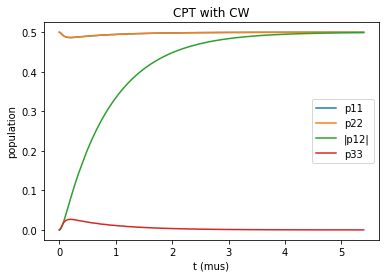

In [7]:
plt.plot(t[:75], p11[:75].real, label='p11')
plt.plot(t[:75], p22[:75].real, label='p22')
plt.plot(t[:75], abs(p12[:75]), label='|p12|')
plt.plot(t[:75], p33[:75].real, label='p33')
plt.legend()
plt.xlabel('t (mus)')
plt.ylabel('population')
plt.title('CPT with CW')
print('final excited state population after ' + str(t1*1e-3) + ' milliseconds: ' + str(p33[-1].real))

In [5]:
p_curr = np.zeros(5, dtype='complex')
for j in range(5):
    p_curr[j] = cw_results.y[j, -1]
    
startt = time.time()
dark_results = free(tfree, p_curr, 0, 0, fs=2, ms=2e1)
endt = time.time()
print(endt-startt)

td = dark_results.t
p11d, p22d, p12d, p13d, p23d = dark_results.y
p33d = np.subtract(np.ones(p11d.size), np.add(p11d, p22d))

16.868545532226562


Text(0.5, 1.0, 'free evolution of p11 and p12 after 2.0 ms pulse')

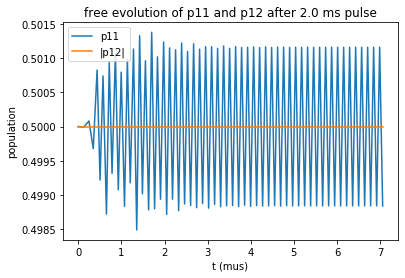

In [10]:
plt.plot(td[:100], p11d[:100].real, label='p11')
#plt.plot(td[:100], p22d[:100].real, label='p22')
plt.plot(td[:100], abs(p12d[:100]), label='|p12|')
#plt.plot(td[:100], p33d[:100].real, label='p33')
plt.legend()
plt.xlabel('t (mus)')
plt.ylabel('population')
plt.title('free evolution of p11 and p12 after ' + str(t1*1e-3) + ' ms pulse')

Text(0.5, 1.0, 'free evolution of p33 after 2.0 ms pulse')

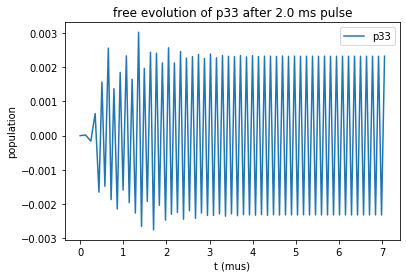

In [11]:
#plt.plot(td[:100], p11d[:100].real, label='p11')
#plt.plot(td[:100], p22d[:100].real, label='p22')
#plt.plot(td[:100], abs(p12d[:100]), label='|p12|')
plt.plot(td[:100], p33d[:100].real, label='p33')
plt.legend()
plt.xlabel('t (mus)')
plt.ylabel('population')
plt.title('free evolution of p33 after ' + str(t1*1e-3) + ' ms pulse')

In [12]:
p_curr2 = np.zeros(5, dtype='complex')
for j in range(5):
    p_curr2[j] = dark_results.y[j, -1]
    
meas_results = cw(tmeasure, p_curr2, w1, w2, 0, 0, fs=1e-1, ms=5e-1)

tf = meas_results.t
p11f, p22f, p12f, p13f, p23f = meas_results.y
p33f = np.subtract(np.ones(p11f.size), np.add(p11f, p22f))

In [ ]:
print(tf.size)

Text(0.5, 1.0, 'populations during second pulse (with zero detuning)')

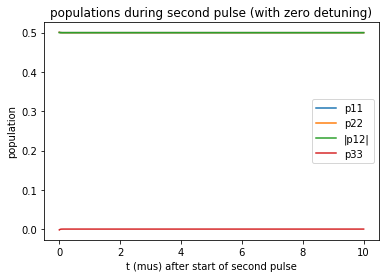

In [13]:
plt.plot(tf, p11f.real, label='p11')
plt.plot(tf, p22f.real, label='p22')
plt.plot(tf, abs(p12f), label='|p12|')
plt.plot(tf, p33f.real, label='p33')
plt.legend()
plt.xlabel('t (mus) after start of second pulse')
plt.ylabel('population')
plt.title('populations during second pulse (with zero detuning)')

In [60]:
d1_max = 7
n=200
(d1_lin1, ptot_lin1) = cw_res(20, P0, 0.05, 0.05, d1_max, n=n, fs=2e-2, ms=2e-1)

Text(0.5, 1.0, 'cw resonance')

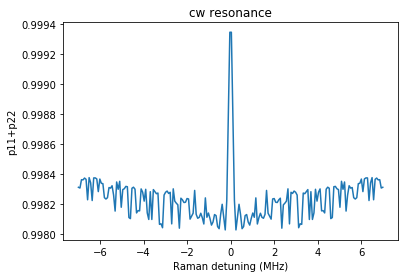

In [61]:
plt.plot(d1_lin1, ptot_lin1.real)
plt.xlabel('Raman detuning (MHz)')
plt.ylabel('p11+p22')
plt.title('cw resonance')

In [13]:
def writespec(filename, detuning, pop):
    with open(filename, "w") as datafile:
        writer = csv.writer(datafile)
        writer.writerow(['detuning (MHz)', 'p11+p22'])
        for i in range(detuning.size):
            writer.writerow([detuning[i], pop[i].real])
    return

In [14]:
writespec('cw_res1.csv', d1_lin1, ptot_lin1)

In [ ]:
d1_max = 50e6
d2 = 0
n=100

(d1_ram, p33_ram) = ram_res(t1, tfree, tmeasure, P0, I1, I2, d1_max, n=n, fs=5e-4, ms=1e-3)

plt.plot(d1_ram*1e-6, p33_ram.real)
plt.xlabel('Raman detuning (Hz)')
plt.ylabel('excited state population')
plt.title('Ramsey fringes')